# <mark>DECORATORS

## In Python, functions are first class objects

Properties of first class functions:
    
    First claas objects: functions in Python **can be used or passed as arguments.**
    A function is an instance of the Object type.
    You can store the function in a variable.
    You can pass the function as a parameter to another function.
    You can return the function from a function.
    You can store them in data structures such as hash tables, lists, …

In [18]:
"""
Python program to illustrate functions can be treated as objects: 
We have assigned the function shout to a variable. 
This will not call the function instead it takes the function object referenced by a shout and 
creates a second name pointing to it, yell.
"""
def shout(text):
    return text.upper()

print(shout('Hello'))

yell = shout

print(yell('Hello'))

HELLO
HELLO


In [1]:
# Python program to illustrate functions can be passed as arguments to other functions
def shout(text):
    return text.upper()

def whisper(text):
    return text.lower()

def greet(func):
    # storing the function in a variable
    greeting = func("""Hi, I am created by a function passed as an argument.""")
    print (greeting)

greet(shout)
greet(whisper)

HI, I AM CREATED BY A FUNCTION PASSED AS AN ARGUMENT.
hi, i am created by a function passed as an argument.


In [25]:
def printing():
    print('python')
    
def adding(x):
    return x+x

d = printing
e = printing()
f = adding
g = adding(3)

print(d)
print(e)
print(f)
print(g)
print(f(100))

python
<function printing at 0x0000003A358A4820>
None
<function adding at 0x0000003A358A4790>
6
200


In [2]:
# Functions can return another function

def create_adder(x):
    def adder(y):
        return x+y
    return adder

add_15 = create_adder(15)
print(add_15)
print(add_15(10))

<function create_adder.<locals>.adder at 0x000002311F1A9700>
25


In [5]:
add_22_55 = create_adder(22)(55)
add_22_55

77

## Python has an interesting feature called decorators to add functionality to an existing code.

This is also called metaprogramming because a part of the program tries to modify another part of the program at compile time.

Everything in Python (Yes! Even classes), are objects. Names that we define are simply identifiers bound to these objects. Functions are no exceptions, they are objects too (with attributes). Various different names can be bound to the same function object.

To modify the behaviour of a function or class.

**Decorators allow us to wrap another function in order to extend the behaviour of the wrapped function, without permanently modifying it.**

Functions can be passed as arguments to another function.

Ex. Functions like map, filter, reduce take another function as an arguement

In [6]:
def first(msg):
    print(msg)


first("Hello")

second = first
second("Hello")

Hello
Hello


In [2]:
def inc(x):
    return x + 1


def dec(x):
    return x - 1


def operate(func, x):
    result = func(x)
    return result

A function can return another function.

In below code: is_returned() is a nested function which is defined and returned each time we call is_called()

In [8]:
def is_called():
    def is_returned():
        print("Hello")
    return is_returned


new = is_called()

# Outputs "Hello"
new()

Hello


In [9]:
called_twice = is_called()()
called_twice

Hello


#### Functions and methods are called callable as they can be called.

    A decorator is a callable that returns a callable.
    Basically, a decorator takes in a function, adds some functionality and returns it.
    The decorator acts as a wrapper. The nature of the object that got decorated (actual gift inside) does not alter.

In [23]:
def make_pretty(func):
    def inner():
        print("Starting decoration *****")
        func()
        print("***** Ending decoration")
    return inner


def ordinary():
    print("I am ordinary")

In [24]:
# 1. method one of passing a function as an arguemeent to another function
ordinary = make_pretty(ordinary)
ordinary()

Starting decoration *****
I am ordinary
***** Ending decoration


In [25]:
# 2. Instead of above cell we can use @ to make the code more cleaner
@make_pretty
def ordinary():
    print("I am ordinary")
    
ordinary()

Starting decoration *****
I am ordinary
***** Ending decoration


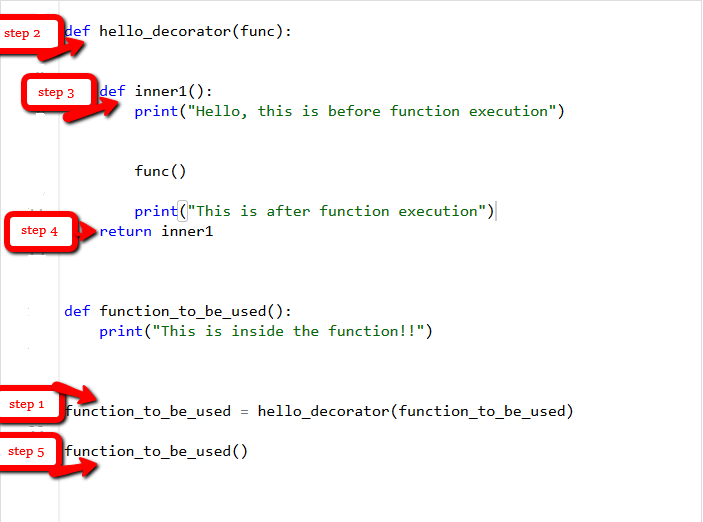

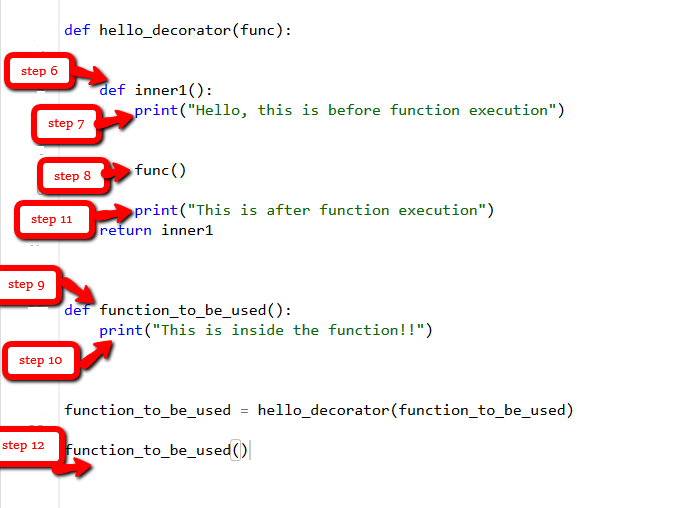

## <mark> Decorating Functions with Parameters

**The parameters of the nested inner() function inside the decorator is the same as the parameters of functions it decorates.**

**We can make general decorators that work with any number of parameters using function(args, kwargs)**

The inner function takes the argument as * args and ** kwargs which means that a tuple of positional arguments or a dictionary of keyword arguments can be passed of any length. This makes it a general decorator that can decorate a function having any number of arguments.

In [33]:
def smart_divide(func):
    def inner(a, b):
        if b==0:
            print('Can not divie by zero')
        else:
            return func(a, b)
    return inner

@smart_divide
def divide(a, b):
    print(a/b)

divide(1, 0)
divide(1, 8)

Can not divie by zero
0.125


In [34]:
# general wraaper function that can work with any number of parameters
def works_for_all(func):
    def inner(*args, **kwargs):
        print("I can decorate any function")
        return func(*args, **kwargs)
    return inner


@works_for_all
def divide(a, b):
    print(a/b)

In [51]:
# the arguement passed to main function can be altered inside the wrapper function
def decorate_it(func):
    def wrapper(x):
        print("Before function call")
        x = x*10
        func(x)
        print("After function call")
    return wrapper

@decorate_it
def hello(name):
    print("Hello-->", name)

hello("Max")

Before function call
Hello--> MaxMaxMaxMaxMaxMaxMaxMaxMaxMax
After function call


## <mark> Chaining Decorators in Python

    Multiple decorators can be chained in Python.
    A function can be decorated multiple times with different (or same) decorators.
    The order followed is bottom-up approach

In [3]:
def stars_decorator(func, finally_say='All done!!'):
    def inner(*args, **kwargs):
        print("*" * 30)
        func(*args, **kwargs)
        print("*" * 30)
        print(finally_say)
    return inner


def dot_decorator(func):
    def inner(*args, **kwargs):
        print("." * 30)
        func(*args, **kwargs)
        print("." * 30)
    return inner


@stars_decorator(finally_say='Congratulations, its done!')
@dot_decorator
def print_and_decorate(**msg):
    print(msg)


print_and_decorate(msg="Hello")

TypeError: stars_decorator() missing 1 required positional argument: 'func'

## <mark> Python Built-In class decorators.

    1. @classmethod
    2. @staticmethod
    3. @property